In [1]:
import pandas as pd
import scipy.stats
import pandas as pd
import nltk
import ast
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
from scipy.stats import spearmanr
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 1st Data 

#### no removal

In [2]:
df = pd.read_csv('/Users/lucian/library/cloudstorage/box-box/memoMedia/reddit_Data/Fetch_Data1/reddit_scores.csv')

In [3]:
spearman_comments = scipy.stats.spearmanr(df['memorability_score'], df['comments'])
spearman_upvotes = scipy.stats.spearmanr(df['memorability_score'], df['upvotes'])

print('Memorability ~ Comments:',
      '\n', f'Spearman rho: {spearman_comments[0].round(3)}',
      '\n', f'p value: {spearman_comments[1].round(5)}')

print('Memorability ~ upvotes:',
      '\n', f'Spearman rho: {spearman_upvotes[0].round(3)}',
      '\n', f'p value: {spearman_upvotes[1].round(5)}')

Memorability ~ Comments: 
 Spearman rho: 0.183 
 p value: 3e-05
Memorability ~ upvotes: 
 Spearman rho: 0.103 
 p value: 0.02089


#### "outlier" removal

In [4]:
# Concatenate
raw = pd.read_csv('/Users/lucian/library/cloudstorage/box-box/memoMedia/reddit_Data/Fetch_Data1/reddit_scores.csv')

In [5]:
# Calculate Q1, Q3, and IQR for 'upvotes'
Q1_upvotes = raw['upvotes'].quantile(0.25)
Q3_upvotes = raw['upvotes'].quantile(0.75)
IQR_upvotes = Q3_upvotes - Q1_upvotes

# Calculate Q1, Q3, and IQR for 'comments'
Q1_comments = raw['comments'].quantile(0.25)
Q3_comments = raw['comments'].quantile(0.75)
IQR_comments = Q3_comments - Q1_comments

# Determine outliers' thresholds for 'upvotes'
lower_thresh_upvotes = Q1_upvotes - 1.5 * IQR_upvotes
upper_thresh_upvotes = Q3_upvotes + 1.5 * IQR_upvotes

# Determine outliers' thresholds for 'comments'
lower_thresh_comments = Q1_comments - 1.5 * IQR_comments
upper_thresh_comments = Q3_comments + 1.5 * IQR_comments

# outlier indices
outlier_indices = raw[(raw['upvotes'] < lower_thresh_upvotes) | (raw['upvotes'] > upper_thresh_upvotes) |
                      (raw['comments'] < lower_thresh_comments) | (raw['comments'] > upper_thresh_comments)].index

# Filter out outliers for both 'upvotes' and 'comments'
df = raw.drop(outlier_indices).reset_index(drop=True)

In [ ]:
# Ensure the `date_posted` is in datetime format
df['date_posted'] = pd.to_datetime(df['date_posted'])
# Convert `date_posted` into a numeric feature (e.g., days since the earliest post)
df['days_since_start'] = (df['date_posted'] - df['date_posted'].min()).dt.total_seconds() / (60 * 60 * 24)  # Convert to days

In [6]:
spearman_comments = scipy.stats.spearmanr(df['memorability_score'], df['comments'])
spearman_upvotes = scipy.stats.spearmanr(df['memorability_score'], df['upvotes'])

print('Memorability ~ Comments:',
      '\n', f'Spearman rho: {spearman_comments[0].round(3)}',
      '\n', f'p value: {spearman_comments[1].round(5)}')

print('Memorability ~ upvotes:',
      '\n', f'Spearman rho: {spearman_upvotes[0].round(3)}',
      '\n', f'p value: {spearman_upvotes[1].round(5)}')

Memorability ~ Comments: 
 Spearman rho: 0.157 
 p value: 0.0014
Memorability ~ upvotes: 
 Spearman rho: 0.059 
 p value: 0.23262


In [7]:
# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to parse the JSON strings
def parse_json(json_str):
    try:
        return ast.literal_eval(json_str)
    except ValueError as e:
        print(f"Error parsing JSON: {e}")

# Apply the function to each entry in the 'top_comments' column
df.loc[:, 'top_comments'] = df['top_comments'].apply(parse_json)

df['sentiment_scores'] = df['top_comments'].apply(
    lambda comments: [sia.polarity_scores(comment['comment_body'])['compound'] for comment in comments if 'comment_body' in comment]
)

df.loc[:,'average_sentiment'] = df['sentiment_scores'].apply(lambda scores: sum(scores) / len(scores) if scores else 0)

correlation, p_value = spearmanr(df['memorability_score'], df['average_sentiment'])

print(f"Spearman rho: {correlation.round(3)}")
print(f"p value: {p_value.round(5)}")

Spearman rho: -0.176
p value: 0.00032


### 2nd Data

#### no removal

In [8]:
df = pd.read_csv('/Users/lucian/library/cloudstorage/box-box/memoMedia/reddit_Data/Fetch_Data2/reddit_scores.csv')

In [9]:
spearman_comments = scipy.stats.spearmanr(df['memorability_score'], df['comments'])
spearman_upvotes = scipy.stats.spearmanr(df['memorability_score'], df['upvotes'])

print('Memorability ~ Comments:',
      '\n', f'Spearman rho: {spearman_comments[0].round(3)}',
      '\n', f'p value: {spearman_comments[1].round(5)}')

print('Memorability ~ upvotes:',
      '\n', f'Spearman rho: {spearman_upvotes[0].round(3)}',
      '\n', f'p value: {spearman_upvotes[1].round(5)}')

Memorability ~ Comments: 
 Spearman rho: 0.135 
 p value: 0.00971
Memorability ~ upvotes: 
 Spearman rho: 0.133 
 p value: 0.01054


#### "outlier" removal

In [10]:
# Concatenate
raw = pd.read_csv('/Users/lucian/library/cloudstorage/box-box/memoMedia/reddit_Data/Fetch_Data2/reddit_scores.csv')

In [11]:
# Calculate Q1, Q3, and IQR for 'upvotes'
Q1_upvotes = raw['upvotes'].quantile(0.25)
Q3_upvotes = raw['upvotes'].quantile(0.75)
IQR_upvotes = Q3_upvotes - Q1_upvotes

# Calculate Q1, Q3, and IQR for 'comments'
Q1_comments = raw['comments'].quantile(0.25)
Q3_comments = raw['comments'].quantile(0.75)
IQR_comments = Q3_comments - Q1_comments

# Determine outliers' thresholds for 'upvotes'
lower_thresh_upvotes = Q1_upvotes - 1.5 * IQR_upvotes
upper_thresh_upvotes = Q3_upvotes + 1.5 * IQR_upvotes

# Determine outliers' thresholds for 'comments'
lower_thresh_comments = Q1_comments - 1.5 * IQR_comments
upper_thresh_comments = Q3_comments + 1.5 * IQR_comments

# outlier indices
outlier_indices = raw[(raw['upvotes'] < lower_thresh_upvotes) | (raw['upvotes'] > upper_thresh_upvotes) |
                      (raw['comments'] < lower_thresh_comments) | (raw['comments'] > upper_thresh_comments)].index

# Filter out outliers for both 'upvotes' and 'comments'
df = raw.drop(outlier_indices).reset_index(drop=True)

In [12]:
spearman_comments = scipy.stats.spearmanr(df['memorability_score'], df['comments'])
spearman_upvotes = scipy.stats.spearmanr(df['memorability_score'], df['upvotes'])

print('Memorability ~ Comments:',
      '\n', f'Spearman rho: {spearman_comments[0].round(3)}',
      '\n', f'p value: {spearman_comments[1].round(5)}')

print('Memorability ~ upvotes:',
      '\n', f'Spearman rho: {spearman_upvotes[0].round(3)}',
      '\n', f'p value: {spearman_upvotes[1].round(5)}')

Memorability ~ Comments: 
 Spearman rho: 0.132 
 p value: 0.02457
Memorability ~ upvotes: 
 Spearman rho: 0.138 
 p value: 0.01875


In [13]:
# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to parse the JSON strings
def parse_json(json_str):
    try:
        return ast.literal_eval(json_str)
    except ValueError as e:
        print(f"Error parsing JSON: {e}")

# Apply the function to each entry in the 'top_comments' column
df.loc[:, 'top_comments'] = df['top_comments'].apply(parse_json)

df['sentiment_scores'] = df['top_comments'].apply(
    lambda comments: [sia.polarity_scores(comment['comment_body'])['compound'] for comment in comments if 'comment_body' in comment]
)

df.loc[:,'average_sentiment'] = df['sentiment_scores'].apply(lambda scores: sum(scores) / len(scores) if scores else 0)

correlation, p_value = spearmanr(df['memorability_score'], df['average_sentiment'])

print(f"Spearman rho: {correlation.round(3)}")
print(f"p value: {p_value.round(5)}")

Spearman rho: -0.18
p value: 0.00214


### 3rd Data

#### no removal

In [14]:
df = pd.read_csv('/Users/lucian/library/cloudstorage/box-box/memoMedia/reddit_Data/Fetch_Data3/reddit_scores.csv')

In [15]:
spearman_comments = scipy.stats.spearmanr(df['memorability_score'], df['comments'])
spearman_upvotes = scipy.stats.spearmanr(df['memorability_score'], df['upvotes'])

print('Memorability ~ Comments:',
      '\n', f'Spearman rho: {spearman_comments[0].round(3)}',
      '\n', f'p value: {spearman_comments[1].round(5)}')

print('Memorability ~ upvotes:',
      '\n', f'Spearman rho: {spearman_upvotes[0].round(3)}',
      '\n', f'p value: {spearman_upvotes[1].round(5)}')

Memorability ~ Comments: 
 Spearman rho: 0.329 
 p value: 0.0
Memorability ~ upvotes: 
 Spearman rho: 0.03 
 p value: 0.56116


#### "outlier" removal

In [16]:
# Concatenate
raw = pd.read_csv('/Users/lucian/library/cloudstorage/box-box/memoMedia/reddit_Data/Fetch_Data3/reddit_scores.csv')

In [17]:
# Calculate Q1, Q3, and IQR for 'upvotes'
Q1_upvotes = raw['upvotes'].quantile(0.25)
Q3_upvotes = raw['upvotes'].quantile(0.75)
IQR_upvotes = Q3_upvotes - Q1_upvotes

# Calculate Q1, Q3, and IQR for 'comments'
Q1_comments = raw['comments'].quantile(0.25)
Q3_comments = raw['comments'].quantile(0.75)
IQR_comments = Q3_comments - Q1_comments

# Determine outliers' thresholds for 'upvotes'
lower_thresh_upvotes = Q1_upvotes - 1.5 * IQR_upvotes
upper_thresh_upvotes = Q3_upvotes + 1.5 * IQR_upvotes

# Determine outliers' thresholds for 'comments'
lower_thresh_comments = Q1_comments - 1.5 * IQR_comments
upper_thresh_comments = Q3_comments + 1.5 * IQR_comments

# outlier indices
outlier_indices = raw[(raw['upvotes'] < lower_thresh_upvotes) | (raw['upvotes'] > upper_thresh_upvotes) |
                      (raw['comments'] < lower_thresh_comments) | (raw['comments'] > upper_thresh_comments)].index

# Filter out outliers for both 'upvotes' and 'comments'
df = raw.drop(outlier_indices).reset_index(drop=True)

In [18]:
spearman_comments = scipy.stats.spearmanr(df['memorability_score'], df['comments'])
spearman_upvotes = scipy.stats.spearmanr(df['memorability_score'], df['upvotes'])

print('Memorability ~ Comments:',
      '\n', f'Spearman rho: {spearman_comments[0].round(3)}',
      '\n', f'p value: {spearman_comments[1].round(5)}')

print('Memorability ~ upvotes:',
      '\n', f'Spearman rho: {spearman_upvotes[0].round(3)}',
      '\n', f'p value: {spearman_upvotes[1].round(5)}')

Memorability ~ Comments: 
 Spearman rho: 0.234 
 p value: 5e-05
Memorability ~ upvotes: 
 Spearman rho: -0.193 
 p value: 0.00083


In [19]:
# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to parse the JSON strings
def parse_json(json_str):
    try:
        return ast.literal_eval(json_str)
    except ValueError as e:
        print(f"Error parsing JSON: {e}")

# Apply the function to each entry in the 'top_comments' column
df.loc[:, 'top_comments'] = df['top_comments'].apply(parse_json)

df['sentiment_scores'] = df['top_comments'].apply(
    lambda comments: [sia.polarity_scores(comment['comment_body'])['compound'] for comment in comments if 'comment_body' in comment]
)

df.loc[:,'average_sentiment'] = df['sentiment_scores'].apply(lambda scores: sum(scores) / len(scores) if scores else 0)

correlation, p_value = spearmanr(df['memorability_score'], df['average_sentiment'])

print(f"Spearman rho: {correlation.round(3)}")
print(f"p value: {p_value.round(5)}")

Spearman rho: -0.28
p value: 0.0


## Concat data

#### no removal

In [13]:
data1 = pd.read_csv('/Users/lucian/library/cloudstorage/box-box/memoMedia/reddit_Data/Fetch_Data1/reddit_scores.csv')
data2 = pd.read_csv('/Users/lucian/library/cloudstorage/box-box/memoMedia/reddit_Data/Fetch_Data2/reddit_scores.csv')
data3 = pd.read_csv('/Users/lucian/library/cloudstorage/box-box/memoMedia/reddit_Data/Fetch_Data3/reddit_scores.csv')

df = pd.concat([data1, data2, data3], ignore_index=True)

In [12]:
spearman_comments = scipy.stats.spearmanr(df['memorability_score'], df['comments'])
spearman_upvotes = scipy.stats.spearmanr(df['memorability_score'], df['upvotes'])

print('Memorability ~ Comments:',
      '\n', f'Spearman rho: {spearman_comments[0].round(3)}',
      '\n', f'p value: {spearman_comments[1].round(5)}')

print('Memorability ~ upvotes:',
      '\n', f'Spearman rho: {spearman_upvotes[0].round(3)}',
      '\n', f'p value: {spearman_upvotes[1].round(5)}')

Memorability ~ Comments: 
 Spearman rho: 0.23 
 p value: 0.0
Memorability ~ upvotes: 
 Spearman rho: 0.087 
 p value: 0.00222


In [4]:
# Ensure the `date_posted` is in datetime format
df['date_posted'] = pd.to_datetime(df['date_posted'])
# Convert `date_posted` into a numeric feature (e.g., days since the earliest post)
df['days_since_start'] = (df['date_posted'] - df['date_posted'].min()).dt.total_seconds() / (60 * 60 * 24)  # Convert to days

memorability = df['memorability_score']  # Replace with the name of the variable A
comments = df['comments']
time_variable = df['days_since_start']
# Step 1: Regress comments on the time variable
reg_comments = LinearRegression()
reg_comments.fit(time_variable.values.reshape(-1, 1), comments)
comments_residuals = comments - reg_comments.predict(time_variable.values.reshape(-1, 1))

# Step 2: Regress A on the time variable
reg_memorability = LinearRegression()
reg_memorability.fit(time_variable.values.reshape(-1, 1), memorability)
memorability_residuals = memorability - reg_memorability.predict(time_variable.values.reshape(-1, 1))

# Step 3: Compute the partial correlation between the residuals
partial_corr, p_value = spearmanr(comments_residuals, memorability_residuals)

# Output the results
print(f"Partial correlation between memorability and comments (controlling for time): {partial_corr}")
print(f"P-value: {p_value}")

Partial correlation between memorability and comments (controlling for time): 0.06828403231343322
P-value: 0.015878192753905444


#### "outlier" removal

In [14]:
raw = pd.concat([data1, data2, data3], ignore_index=True)

In [15]:
# Calculate Q1, Q3, and IQR for 'upvotes'
Q1_upvotes = raw['upvotes'].quantile(0.25)
Q3_upvotes = raw['upvotes'].quantile(0.75)
IQR_upvotes = Q3_upvotes - Q1_upvotes

# Calculate Q1, Q3, and IQR for 'comments'
Q1_comments = raw['comments'].quantile(0.25)
Q3_comments = raw['comments'].quantile(0.75)
IQR_comments = Q3_comments - Q1_comments

# Determine outliers' thresholds for 'upvotes'
lower_thresh_upvotes = Q1_upvotes - 1.5 * IQR_upvotes
upper_thresh_upvotes = Q3_upvotes + 1.5 * IQR_upvotes

# Determine outliers' thresholds for 'comments'
lower_thresh_comments = Q1_comments - 1.5 * IQR_comments
upper_thresh_comments = Q3_comments + 1.5 * IQR_comments

# outlier indices
outlier_indices = raw[(raw['upvotes'] < lower_thresh_upvotes) | (raw['upvotes'] > upper_thresh_upvotes) |
                      (raw['comments'] < lower_thresh_comments) | (raw['comments'] > upper_thresh_comments)].index

# Filter out outliers for both 'upvotes' and 'comments'
df = raw.drop(outlier_indices).reset_index(drop=True)

In [16]:
spearman_comments = scipy.stats.spearmanr(df['memorability_score'], df['comments'])
spearman_upvotes = scipy.stats.spearmanr(df['memorability_score'], df['upvotes'])

print('Memorability ~ Comments:',
      '\n', f'Spearman rho: {spearman_comments[0].round(3)}',
      '\n', f'p value: {spearman_comments[1].round(5)}')

print('Memorability ~ upvotes:',
      '\n', f'Spearman rho: {spearman_upvotes[0].round(3)}',
      '\n', f'p value: {spearman_upvotes[1].round(5)}')

Memorability ~ Comments: 
 Spearman rho: 0.203 
 p value: 0.0
Memorability ~ upvotes: 
 Spearman rho: -0.004 
 p value: 0.90241


In [8]:
# Ensure the `date_posted` is in datetime format
df['date_posted'] = pd.to_datetime(df['date_posted'])
# Convert `date_posted` into a numeric feature (e.g., days since the earliest post)
df['days_since_start'] = (df['date_posted'] - df['date_posted'].min()).dt.total_seconds() / (60 * 60 * 24)  # Convert to days

memorability = df['memorability_score']  # Replace with the name of the variable A
comments = df['comments']
time_variable = df['days_since_start']
# Step 1: Regress upvotes on the time variable
reg_comments = LinearRegression()
reg_comments.fit(time_variable.values.reshape(-1, 1), comments)
comments_residuals = comments - reg_comments.predict(time_variable.values.reshape(-1, 1))

# Step 2: Regress A on the time variable
reg_memorability = LinearRegression()
reg_memorability.fit(time_variable.values.reshape(-1, 1), memorability)
memorability_residuals = memorability - reg_memorability.predict(time_variable.values.reshape(-1, 1))

# Step 3: Compute the partial correlation between the residuals
partial_corr, p_value = spearmanr(comments_residuals, memorability_residuals)

# Output the results
print(f"Partial correlation between memorability and comments (controlling for time): {partial_corr}")
print(f"P-value: {p_value}")

Partial correlation between memorability and comments (controlling for time): 0.18334579758785258
P-value: 5.495180687445773e-09


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score

X = df['memorability_score'].values.reshape(-1, 1)
y = df['comments'].values

X_const = sm.add_constant(X).reshape(-1, 2) 

# Fit the Negative Binomial model
nb_model = sm.GLM(y, X_const, family=sm.families.NegativeBinomial(alpha=0.27)).fit(cov_type='HC3')
print(nb_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  997
Model:                            GLM   Df Residuals:                      995
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3202.7
Date:                Wed, 08 Jan 2025   Deviance:                       965.55
Time:                        19:12:43   Pearson chi2:                 1.39e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.06514
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5384      0.116     13.293      0.0

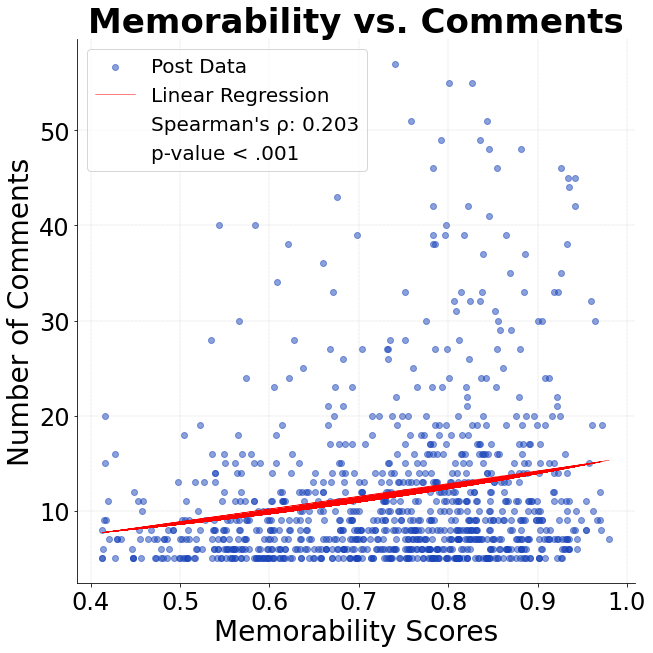

In [10]:
# Generate predictions
predictions = nb_model.predict(X_const)

# Plotting
plt.figure(figsize=(10, 10))
plt.scatter(X, y, alpha=0.5, label='Post Data', color = '#1944ba')
plt.plot(X, predictions, color='red', label='Linear Regression', linewidth=0.5)
legend_text = [f"Spearman's ρ: {spearman_comments[0]:.3f}", f'p-value < .001']
# Add the custom text to the legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([plt.Line2D([], [], color='none', label=legend_text[0]), 
                plt.Line2D([], [], color='none', label=legend_text[1])])
plt.legend(handles=handles, fontsize=20)

plt.title('Memorability vs. Comments', fontsize=34, fontweight='bold')
plt.xlabel('Memorability Scores', fontsize=28)
plt.ylabel('Number of Comments', fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.tick_params(axis='both', which='minor', labelsize=22)
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)    # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine
plt.grid(True, linestyle=':', color='gray', linewidth=0.3)
plt.show()

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score

X = df['memorability_score'].values.reshape(-1, 1)
y = df['upvotes'].values

X_const = sm.add_constant(X).reshape(-1, 2)  

# Fit the Negative Binomial model
nb_model = sm.GLM(y, X_const, family=sm.families.NegativeBinomial(alpha=0.5)).fit(cov_type='HC3')
print(nb_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  997
Model:                            GLM   Df Residuals:                      995
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6276.1
Date:                Tue, 19 Nov 2024   Deviance:                       1613.2
Time:                        15:01:59   Pearson chi2:                 1.06e+03
No. Iterations:                     5   Pseudo R-squ. (CS):          0.0009365
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1485      0.122     42.052      0.0

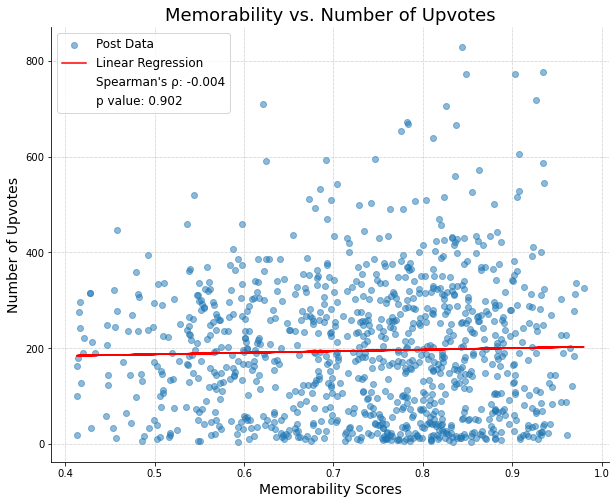

In [28]:
# Generate predictions
predictions = nb_model.predict(X_const)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(X, y, alpha=0.5, label='Post Data')
plt.plot(X, predictions, color='red', label='Linear Regression', linewidth=1.5)
legend_text = [f"Spearman's ρ: {spearman_upvotes[0]:.3f}", f'p value: {spearman_upvotes[1]:.3f}']
# Add the custom text to the legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([plt.Line2D([], [], color='none', label=legend_text[0]), 
                plt.Line2D([], [], color='none', label=legend_text[1])])
plt.legend(handles=handles, fontsize=12)

plt.title('Memorability vs. Number of Upvotes', fontsize=18)
plt.xlabel('Memorability Scores', fontsize=14)
plt.ylabel('Number of Upvotes', fontsize=14)
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)    # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine
plt.grid(True, linestyle=':', color='gray', linewidth=0.5)
plt.show()

In [29]:
# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to parse the JSON strings
def parse_json(json_str):
    try:
        return ast.literal_eval(json_str)
    except ValueError as e:
        print(f"Error parsing JSON: {e}")

# Apply the function to each entry in the 'top_comments' column
df.loc[:, 'top_comments'] = df['top_comments'].apply(parse_json)

df['sentiment_scores'] = df['top_comments'].apply(
    lambda comments: [sia.polarity_scores(comment['comment_body'])['compound'] for comment in comments if 'comment_body' in comment]
)

df.loc[:,'average_sentiment'] = df['sentiment_scores'].apply(lambda scores: sum(scores) / len(scores) if scores else 0)
spearman_sentiments = spearmanr(df['memorability_score'], df['average_sentiment'])

print(f"Spearman rho: {spearman_sentiments[0].round(3)}")
print(f"p value: {spearman_sentiments[1].round(8)}")

Spearman rho: -0.242
p value: 0.0


In [30]:
X = df['memorability_score'].values.reshape(-1, 1)  # reshaping for sklearn
y = df['average_sentiment'].values
model = LinearRegression().fit(X, y)
predictions = model.predict(X)


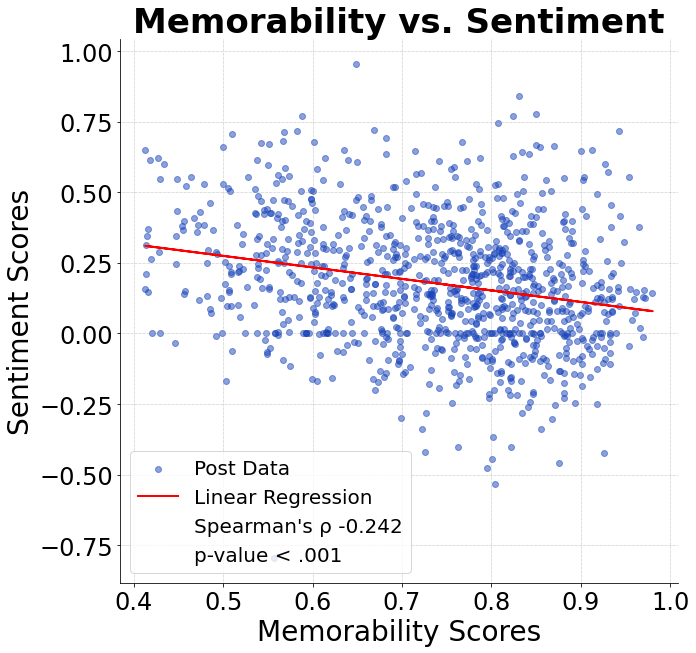

In [31]:

# Plotting
plt.figure(figsize=(10, 10))
plt.scatter(X, y, alpha=0.5, label='Post Data', color = '#1944ba')
plt.plot(X, predictions, color='red', label='Linear Regression', linewidth = 2)
legend_text = [f"Spearman's ρ {spearman_sentiments[0]:.3f}", f'p-value < .001']
# Add the custom text to the legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([plt.Line2D([], [], color='none', label=legend_text[0]), 
                plt.Line2D([], [], color='none', label=legend_text[1])])
plt.legend(handles=handles, fontsize=20)

plt.title('Memorability vs. Sentiment', fontsize=34, fontweight='bold')
plt.xlabel('Memorability Scores', fontsize=28)
plt.ylabel('Sentiment Scores', fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.tick_params(axis='both', which='minor', labelsize=22)
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)    # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine
plt.grid(True, linestyle=':', color='gray', linewidth=0.5)
plt.show()

In [32]:
import scipy.stats as stats
import pandas as pd

bins = pd.qcut(df['memorability_score'], q=2, labels=['Low', 'High'])
df['memorability_bin'] = bins

low_group = df[df['memorability_bin'] == 'Low']['average_sentiment']
high_group = df[df['memorability_bin'] == 'High']['average_sentiment']
print(low_group.mean())
print(high_group.mean())

t_stat, p_val = stats.ttest_ind(high_group, low_group, alternative='less')
print(f"One-tailed T-test: t-statistic = {t_stat}, p-value = {p_val}")


0.22242317969271877
0.13469754016064256
One-tailed T-test: t-statistic = -6.332386351154634, p-value = 1.824204217962247e-10


In [33]:
import numpy as np
from scipy.stats import spearmanr

df['abs_sentiment'] = np.abs(df['average_sentiment'])
correlation, p_value = spearmanr(df['abs_sentiment'], df['memorability_score'])

print(f"Correlation: {correlation}, p-value: {p_value}")


Correlation: -0.18914938813589594, p-value: 1.7509230084726296e-09
